# Steps for ARIMA implementation
The general steps to implement an ARIMA model are –

1) Load the data: The first step for model building is of course to load the dataset

2) Preprocessing: Depending on the dataset, the steps of preprocessing will be defined. This will include creating timestamps, converting the dtype of date/time column, making the series univariate, etc.

3) Make series stationary: In order to satisfy the assumption, it is necessary to make the series stationary. This would include checking the stationarity of the series and performing required transformations

4) Determine d value: For making the series stationary, the number of times the difference operation was performed will be taken as the d value

5) Create ACF and PACF plots: This is the most important step in ARIMA implementation. ACF PACF plots are used to determine the input parameters for our ARIMA model

6) Determine the p and q values: Read the values of p and q from the plots in the previous step

7) Fit ARIMA model: Using the processed data and parameter values we calculated from the previous steps, fit the ARIMA model

8) Predict values on validation set: Predict the future values

9) Calculate RMSE: To check the performance of the model, check the RMSE value using the predictions and actual values on the validation set

Although ARIMA is a very powerful model for forecasting time series data, the data preparation and parameter tuning processes end up being really time consuming. Before implementing ARIMA, you need to make the series stationary, and determine the values of p and q using the plots we discussed above. Auto ARIMA makes this task really simple for us as it eliminates steps 3 to 6 we saw in the previous section. Below are the steps you should follow for implementing auto ARIMA:

1) Load the data: This step will be the same. Load the data into your notebook
2) Preprocessing data: The input should be univariate, hence drop the other columns
3) Fit Auto ARIMA: Fit the model on the univariate series
4) Predict values on validation set: Make predictions on the validation set
5) Calculate RMSE: Check the performance of the model using the predicted values against the actual values

We completely bypassed the selection of p and q feature as you can see. What a relief! In the next section, we will implement auto ARIMA using a toy dataset.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2915.641, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2954.973, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2947.014, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.00 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2938.457, Time=0.16 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2915.636, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2984.606, Time=0.09 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2915.168, Time=0.45 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2917.256, Time=0.53 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2924.379, Time=0.38 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2911.007, Time=0.45 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2911.505, Time=0.17 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=2912.933, Time=0.46 sec
 ARIMA(2,1,1)(1,0,1

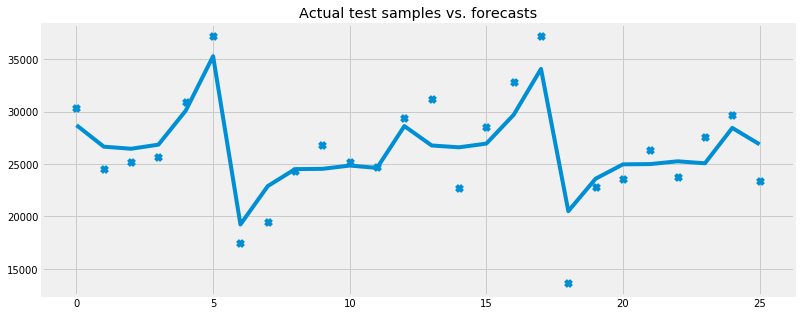

In [6]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_wineind()
train, test = pm.model_selection.train_test_split(data, train_size=150)

# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

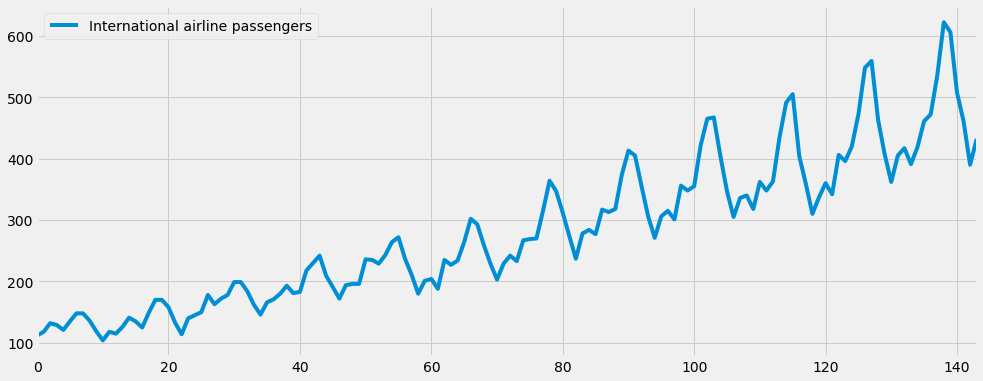

In [7]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
from pandas import read_csv
import statsmodels.api as sm
import matplotlib
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

series = read_csv('international-airline-passengers.csv', parse_dates=True)
series = series.dropna()
series.plot(figsize=(15,6))
plt.show()

In [8]:
series['Month'] = pd.to_datetime(series['Month'])
series = series.set_index('Month')

In [9]:
result = seasonal_decompose(series, model='ad')

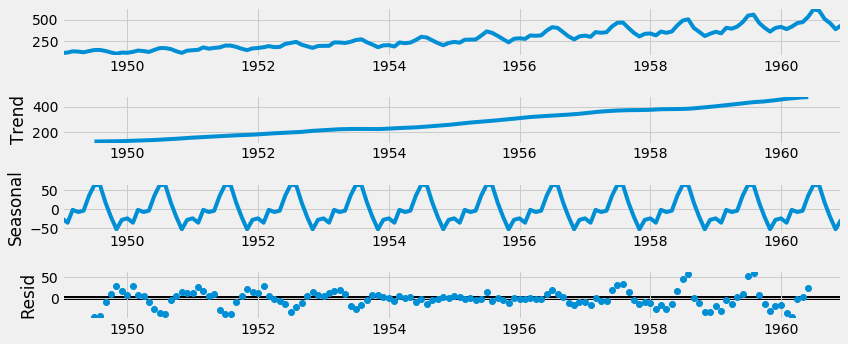

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

In [11]:
train, test = pm.model_selection.train_test_split(series, train_size=100)

<function matplotlib.pyplot.show(*args, **kw)>

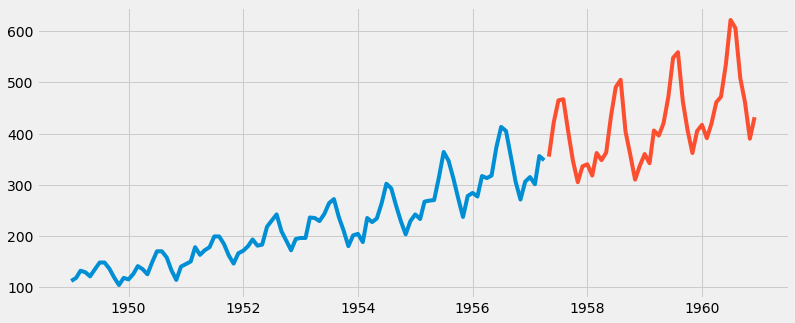

In [20]:
plt.plot(train)
plt.plot(test)
plt.show

In [12]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=647.972, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.193, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=647.127, Time=0.39 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.994, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12] intercep

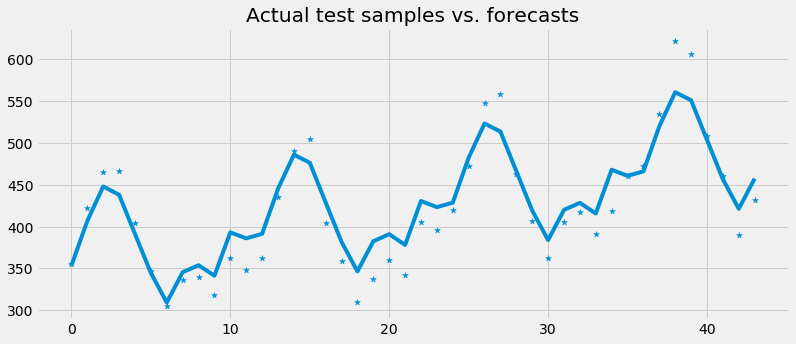

In [13]:
# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='*')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [15]:
predictions=arima.predict(n_periods=test.shape[0])
test_score = np.sqrt(mean_squared_error(test, predictions))
print('Test root MSE: %.3f' % test_score)

Test root MSE: 26.206


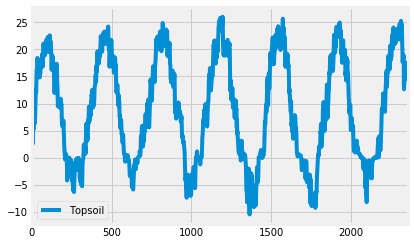

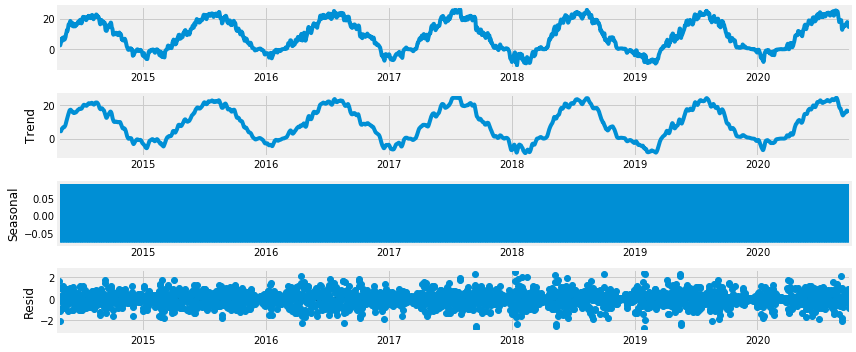

In [16]:
import pandas as pd
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

topsoil = pd.read_csv('https://raw.githubusercontent.com/the-datadudes/deepSoilTemperature/master/meanDickinson.csv',parse_dates=True)

topsoil = topsoil.dropna()
topsoil.head()

topsoil.plot();

topsoil['Date'] = pd.to_datetime(topsoil['Date'])
topsoil = topsoil.set_index('Date').asfreq('D')
result = seasonal_decompose(topsoil, model='ad')

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

In [17]:
train, test = pm.model_selection.train_test_split(topsoil, train_size=1600)

<function matplotlib.pyplot.show(*args, **kw)>

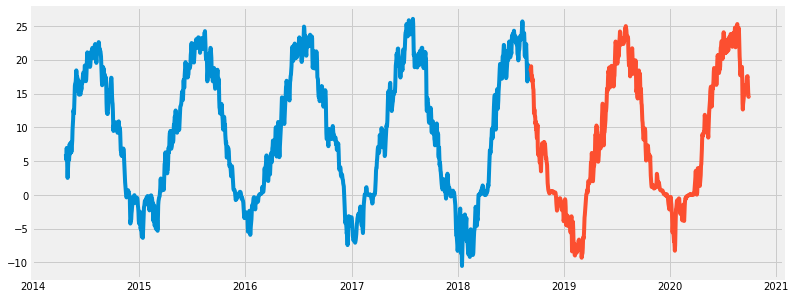

In [18]:
plt.plot(train)
plt.plot(test)
plt.show

In [19]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=5)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=3483.901, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=11788.381, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=8195.751, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=12873.932, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[5] intercept   : AIC=3320.270, Time=0.52 sec
 ARIMA(2,0,2)(0,0,0)[5] intercept   : AIC=3320.036, Time=0.30 sec
 ARIMA(2,0,2)(1,0,0)[5] intercept   : AIC=4385.593, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[5] intercept   : AIC=3323.795, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[5] intercept   : AIC=3323.526, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[5] intercept   : AIC=3316.499, Time=0.34 sec
 ARIMA(3,0,2)(1,0,0)[5] intercept   : AIC=4351.307, Time=0.72 sec
 ARIMA(3,0,2)(0,0,1)[5] intercept   : AIC=3317.817, Time=0.62 sec
 ARIMA(3,0,2)(1,0,1)[5] intercept   : AIC=3397.648, Time=0.91 sec
 ARIMA(3,0,1)(0,0,0)[5] intercept   

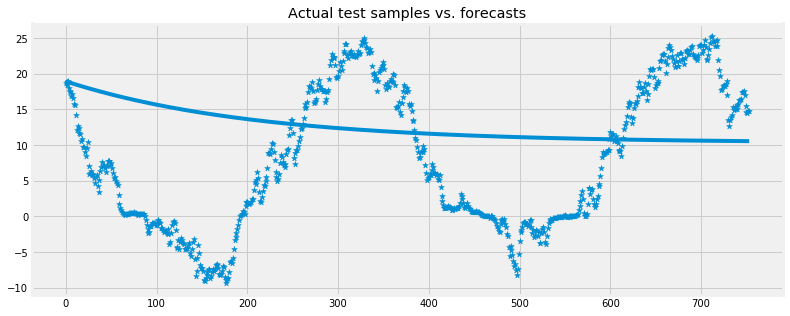

In [20]:
# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='*')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [21]:
predictions=arima.predict(n_periods=test.shape[0])
test_score = np.sqrt(mean_squared_error(test, predictions))
print('Test root MSE: %.3f' % test_score)

Test root MSE: 11.594
